In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
NUM_CLASSES = 10

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
# 1 Sequential

In [7]:
model = Sequential([
    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

In [8]:
# 2 API

In [9]:
input_layer = Input(shape=(32, 32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [11]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

In [12]:
model.fit(x_train,
         y_train, 
         batch_size=32,
         epochs=10,
         shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8573 - accuracy: 0.3327
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6756 - accuracy: 0.4001
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5960 - accuracy: 0.4331
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5414 - accuracy: 0.4530
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4964 - accuracy: 0.4699
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4629 - accuracy: 0.4796
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4328 - accuracy: 0.4912
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4084 - accuracy: 0.4997
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3897 - accuracy: 0.5040
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.368

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 678us/step - loss: 1.4655 - accuracy: 0.4809


[1.4655073881149292, 0.48089998960494995]

In [16]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
                   'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

In [18]:
print(preds)
print(preds_single)

[[2.72514541e-02 7.35609606e-02 2.30195746e-02 ... 2.24309205e-03
  2.09811181e-01 6.72739325e-03]
 [1.18271317e-02 1.50181562e-01 2.31718761e-04 ... 7.88150719e-05
  2.72683442e-01 5.63603461e-01]
 [7.96345994e-02 1.18114196e-01 5.23741939e-04 ... 1.08849385e-03
  7.03827143e-01 9.13318917e-02]
 ...
 [5.90505020e-04 1.47227722e-04 1.62664369e-01 ... 2.35348195e-02
  8.73366743e-03 2.00692797e-03]
 [2.29960009e-02 3.61594632e-02 9.76128876e-02 ... 8.37500952e-03
  5.38314283e-02 6.08577915e-02]
 [1.51227061e-02 7.84711726e-03 7.60625824e-02 ... 3.09461921e-01
  1.86297055e-02 2.61843242e-02]]
['dog' 'truck' 'ship' ... 'cat' 'frog' 'deer']


In [24]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

In [25]:
print(indices)

[7954 9673 6357 8592 9560 2055 9624 1639 8055 1580]


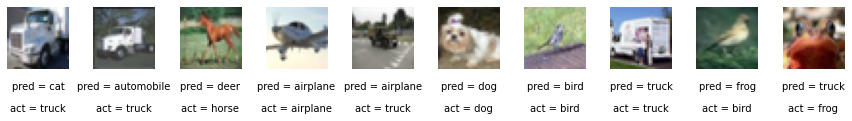

In [28]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img)